<a href="https://www.kaggle.com/code/rajonnachoudhury/adlab7?scriptVersionId=293055297" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 


In [2]:
df=pd.read_csv("/kaggle/input/student-performance-dataset/Student_Performance.csv")
df

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,12047,17,female,public,phd,1.8,55.2,yes,15-30 min,no,mixed,55.8,48.5,46.7,46.1,e
24996,1102,16,female,private,diploma,2.7,97.1,yes,<15 min,no,coaching,64.8,48.2,52.3,56.5,d
24997,4422,19,other,private,post graduate,1.0,63.0,yes,<15 min,no,group study,50.5,20.3,36.1,36.7,f
24998,7858,14,male,private,diploma,1.0,69.4,yes,15-30 min,yes,group study,13.0,34.2,7.3,34.1,f


In [3]:
df.isnull().sum()

student_id               0
age                      0
gender                   0
school_type              0
parent_education         0
study_hours              0
attendance_percentage    0
internet_access          0
travel_time              0
extra_activities         0
study_method             0
math_score               0
science_score            0
english_score            0
overall_score            0
final_grade              0
dtype: int64

In [4]:
df.describe()

,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7493.04380,16.482760,4.253224,75.084084,63.785944,63.745320,63.681948,64.006172
std,4323.56215,1.703895,2.167541,14.373171,20.875262,20.970529,20.792693,18.932025
min,1.00000,14.000000,0.500000,50.000000,0.000000,0.000000,0.000000,14.500000
25%,3743.75000,15.000000,2.400000,62.800000,48.300000,48.200000,48.300000,49.000000
50%,7461.50000,16.000000,4.300000,75.100000,64.100000,64.100000,64.200000,64.200000
75%,11252.00000,18.000000,6.100000,87.500000,80.000000,80.000000,80.000000,79.000000
max,15000.00000,19.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [5]:
df.drop(['gender','school_type'],axis=1,inplace=True)
df

,student_id,age,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,12047,17,phd,1.8,55.2,yes,15-30 min,no,mixed,55.8,48.5,46.7,46.1,e
24996,1102,16,diploma,2.7,97.1,yes,<15 min,no,coaching,64.8,48.2,52.3,56.5,d
24997,4422,19,post graduate,1.0,63.0,yes,<15 min,no,group study,50.5,20.3,36.1,36.7,f
24998,7858,14,diploma,1.0,69.4,yes,15-30 min,yes,group study,13.0,34.2,7.3,34.1,f


In [6]:
#df.drop(['parent_education'],axis=1,inplace=True)
df

,student_id,age,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,12047,17,phd,1.8,55.2,yes,15-30 min,no,mixed,55.8,48.5,46.7,46.1,e
24996,1102,16,diploma,2.7,97.1,yes,<15 min,no,coaching,64.8,48.2,52.3,56.5,d
24997,4422,19,post graduate,1.0,63.0,yes,<15 min,no,group study,50.5,20.3,36.1,36.7,f
24998,7858,14,diploma,1.0,69.4,yes,15-30 min,yes,group study,13.0,34.2,7.3,34.1,f


In [7]:
df.drop(['travel_time','study_method','internet_access'],axis=1,inplace=True)
df

,student_id,age,parent_education,study_hours,attendance_percentage,extra_activities,math_score,science_score,english_score,overall_score,final_grade
0,1,14,post graduate,3.1,84.3,yes,42.7,55.4,57.0,53.1,e
1,2,18,graduate,3.7,87.8,no,57.6,68.8,64.8,61.3,d
2,3,17,post graduate,7.9,65.5,no,84.8,95.0,79.2,89.6,b
3,4,16,high school,1.1,58.1,no,44.4,27.5,54.7,41.6,e
4,5,16,high school,1.3,61.0,yes,8.9,32.7,30.0,25.4,f
...,...,...,...,...,...,...,...,...,...,...,...
24995,12047,17,phd,1.8,55.2,no,55.8,48.5,46.7,46.1,e
24996,1102,16,diploma,2.7,97.1,no,64.8,48.2,52.3,56.5,d
24997,4422,19,post graduate,1.0,63.0,no,50.5,20.3,36.1,36.7,f
24998,7858,14,diploma,1.0,69.4,yes,13.0,34.2,7.3,34.1,f


In [8]:
df.drop(['extra_activities'],axis=1,inplace=True)

In [9]:
df['final_grade'].unique()
print(df.min())
print(df.max())

student_id                     1
age                           14
parent_education         diploma
study_hours                  0.5
attendance_percentage       50.0
math_score                   0.0
science_score                0.0
english_score                0.0
overall_score               14.5
final_grade                    a
dtype: object
student_id                       15000
age                                 19
parent_education         post graduate
study_hours                        8.0
attendance_percentage            100.0
math_score                       100.0
science_score                    100.0
english_score                    100.0
overall_score                    100.0
final_grade                          f
dtype: object


In [10]:
grade_encoded={'f':5,'e':4,'d':3,'c':2,'b':1,'a':0}
df['encoded_grade']=df['final_grade'].map(grade_encoded)
df.columns

Index(['student_id', 'age', 'parent_education', 'study_hours',
       'attendance_percentage', 'math_score', 'science_score', 'english_score',
       'overall_score', 'final_grade', 'encoded_grade'],
      dtype='object')

In [11]:
features=['age', 'study_hours', 'attendance_percentage',
       'math_score', 'science_score', 'english_score', 'overall_score', 'encoded_grade']
corr_features=df[features].corr()
corr_features

,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score,encoded_grade
age,1.000000,-0.003722,0.006050,-0.005234,0.001638,-0.008716,-0.003847,0.008319
study_hours,-0.003722,1.000000,-0.005046,0.802321,0.805073,0.803718,0.905771,-0.879197
attendance_percentage,0.006050,-0.005046,1.000000,0.254772,0.251076,0.252782,0.292762,-0.286868
math_score,-0.005234,0.802321,0.254772,1.000000,0.784111,0.786315,0.884555,-0.858612
science_score,0.001638,0.805073,0.251076,0.784111,1.000000,0.783951,0.885748,-0.858924
english_score,-0.008716,0.803718,0.252782,0.786315,0.783951,1.000000,0.883334,-0.856111
overall_score,-0.003847,0.905771,0.292762,0.884555,0.885748,0.883334,1.000000,-0.972379
encoded_grade,0.008319,-0.879197,-0.286868,-0.858612,-0.858924,-0.856111,-0.972379,1.000000


In [12]:
X=df[['study_hours','math_score', 'science_score', 'english_score']]
y=df[['encoded_grade']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred=model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 0.2122115741698472
R2 Score: 0.8827744297746392


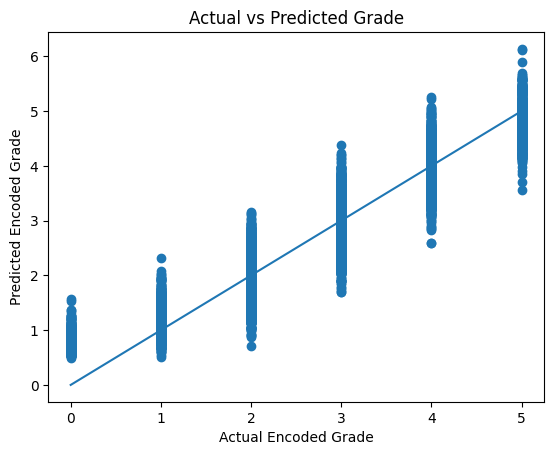

In [16]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Encoded Grade")
plt.ylabel("Predicted Encoded Grade")
plt.title("Actual vs Predicted Grade")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()